In [1]:
# Osteoporosis-Risk-Prediction

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
df = pd.read_csv('osteoporosis.csv')
df.head()

# Droping the 'Id' column
df = df.drop("Id", axis=1)
df.head()

# Checking for missing values
df.isnull().sum()



Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   int64 
 1   Gender               1958 non-null   object
 2   Hormonal Changes     1958 non-null   object
 3   Family History       1958 non-null   object
 4   Race/Ethnicity       1958 non-null   object
 5   Body Weight          1958 non-null   object
 6   Calcium Intake       1958 non-null   object
 7   Vitamin D Intake     1958 non-null   object
 8   Physical Activity    1958 non-null   object
 9   Smoking              1958 non-null   object
 10  Alcohol Consumption  970 non-null    object
 11  Medical Conditions   1311 non-null   object
 12  Medications          973 non-null    object
 13  Prior Fractures      1958 non-null   object
 14  Osteoporosis         1958 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 229.6+ KB


In [3]:
df = df.dropna(axis=1)

# Display the cleaned DataFrame
print(df)

      Age  Gender Hormonal Changes Family History    Race/Ethnicity  \
0      69  Female           Normal            Yes             Asian   
1      32  Female           Normal            Yes             Asian   
2      89  Female   Postmenopausal             No         Caucasian   
3      78  Female           Normal             No         Caucasian   
4      38    Male   Postmenopausal            Yes  African American   
...   ...     ...              ...            ...               ...   
1953   19  Female           Normal            Yes  African American   
1954   23  Female   Postmenopausal            Yes         Caucasian   
1955   34  Female   Postmenopausal             No  African American   
1956   25    Male   Postmenopausal             No  African American   
1957   26  Female   Postmenopausal             No  African American   

      Body Weight Calcium Intake Vitamin D Intake Physical Activity Smoking  \
0     Underweight            Low       Sufficient         Sedentary 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1958 non-null   int64 
 1   Gender             1958 non-null   object
 2   Hormonal Changes   1958 non-null   object
 3   Family History     1958 non-null   object
 4   Race/Ethnicity     1958 non-null   object
 5   Body Weight        1958 non-null   object
 6   Calcium Intake     1958 non-null   object
 7   Vitamin D Intake   1958 non-null   object
 8   Physical Activity  1958 non-null   object
 9   Smoking            1958 non-null   object
 10  Prior Fractures    1958 non-null   object
 11  Osteoporosis       1958 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 183.7+ KB


# Initialize the LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(le.fit_transform)

correlation_matrix = df.corr()

print(correlation_matrix)


                        Age    Gender  Hormonal Changes  Family History  \
Age                1.000000  0.015105          0.005464       -0.016848   
Gender             0.015105  1.000000         -0.018361        0.019671   
Hormonal Changes   0.005464 -0.018361          1.000000        0.020393   
Family History    -0.016848  0.019671          0.020393        1.000000   
Race/Ethnicity    -0.029398  0.015803         -0.034173        0.015095   
Body Weight        0.017046  0.010880         -0.007259        0.003139   
Calcium Intake     0.002128 -0.009536         -0.016296        0.024001   
Vitamin D Intake   0.019184  0.022052         -0.000955       -0.009587   
Physical Activity  0.020651  0.027155         -0.019513       -0.023330   
Smoking            0.027591 -0.039881         -0.006122       -0.013222   
Prior Fractures   -0.023989 -0.016399          0.011244       -0.006051   
Osteoporosis       0.691238  0.012258          0.015322       -0.002043   

                   Race/

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                1958 non-null   int64
 1   Gender             1958 non-null   int32
 2   Hormonal Changes   1958 non-null   int32
 3   Family History     1958 non-null   int32
 4   Race/Ethnicity     1958 non-null   int32
 5   Body Weight        1958 non-null   int32
 6   Calcium Intake     1958 non-null   int32
 7   Vitamin D Intake   1958 non-null   int32
 8   Physical Activity  1958 non-null   int32
 9   Smoking            1958 non-null   int32
 10  Prior Fractures    1958 non-null   int32
 11  Osteoporosis       1958 non-null   int64
dtypes: int32(10), int64(2)
memory usage: 107.2 KB


# Boxplot for features

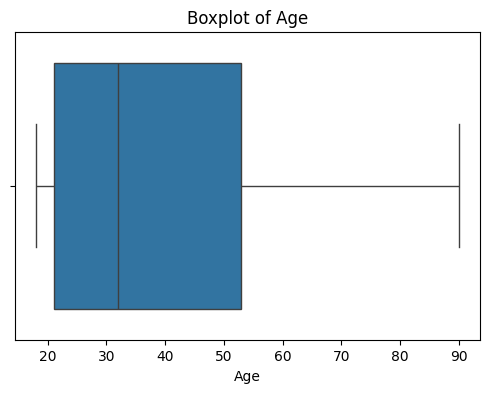

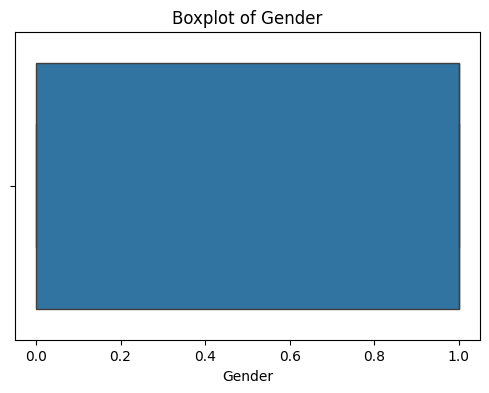

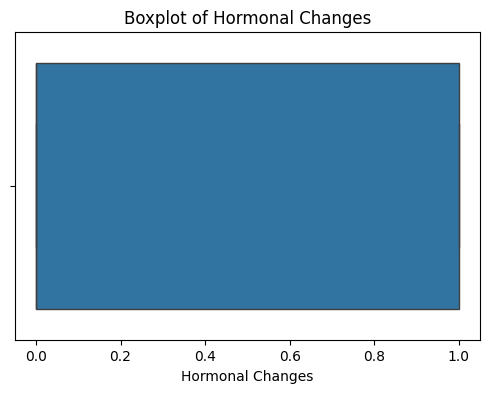

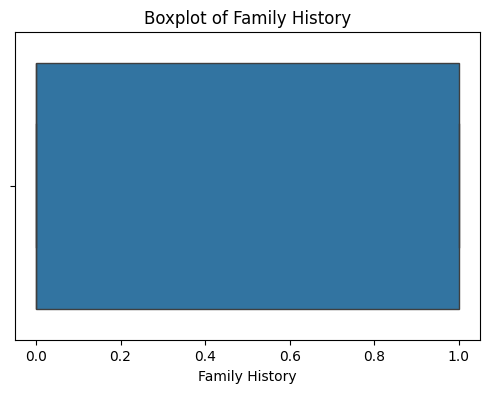

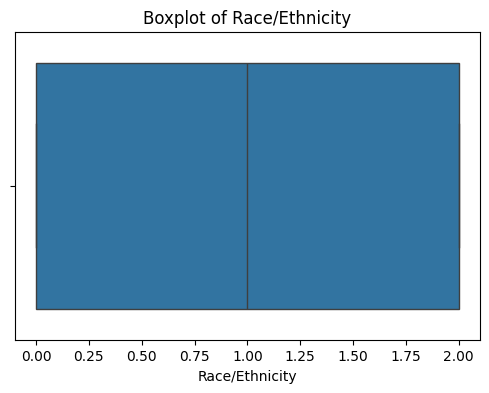

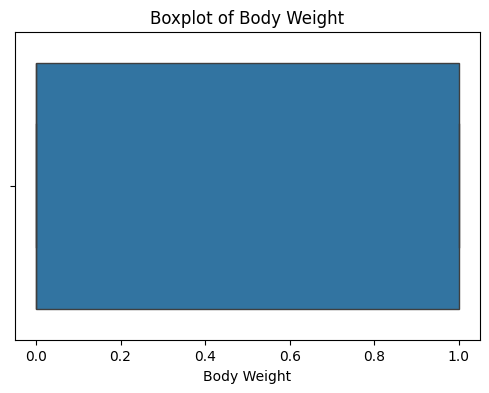

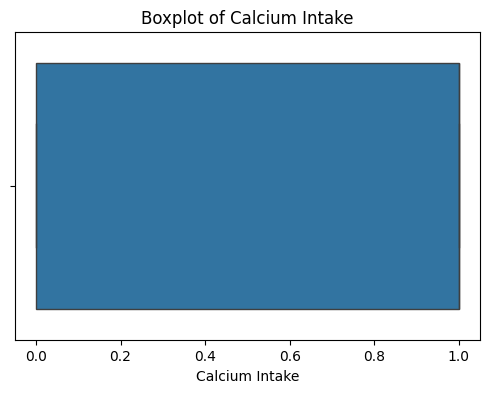

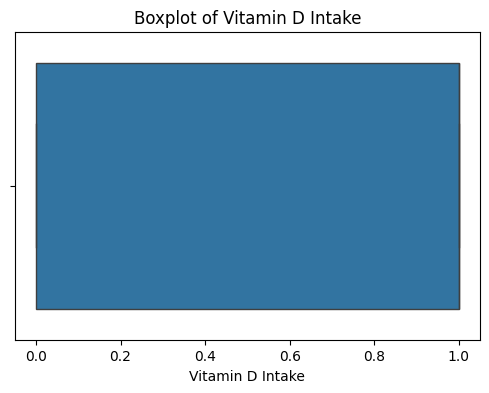

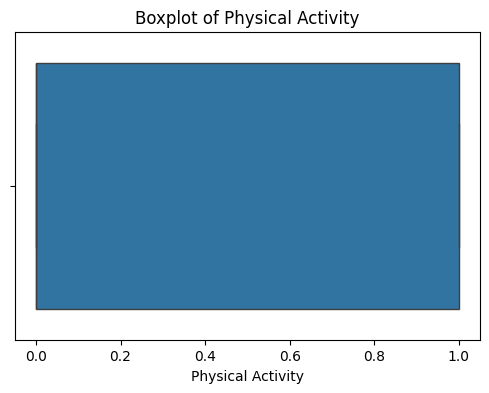

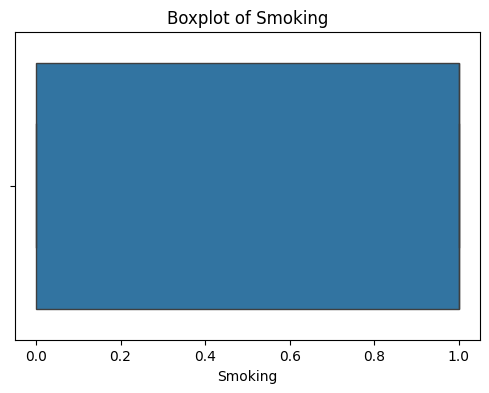

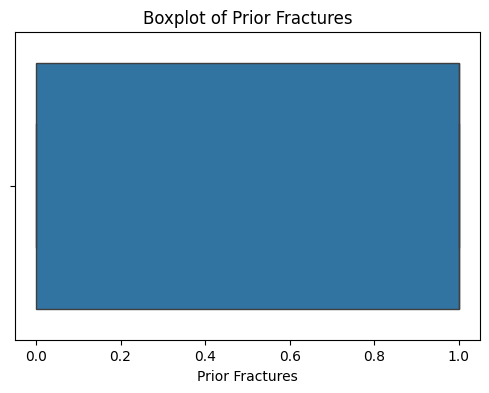

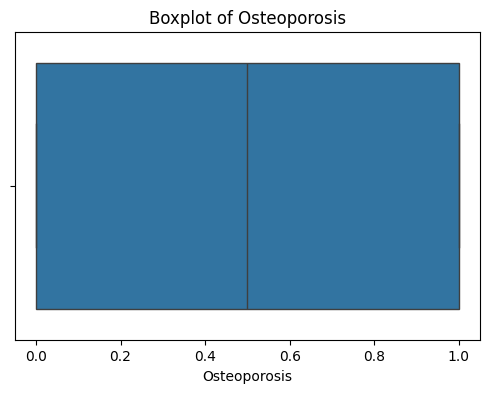

In [7]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation Matrix

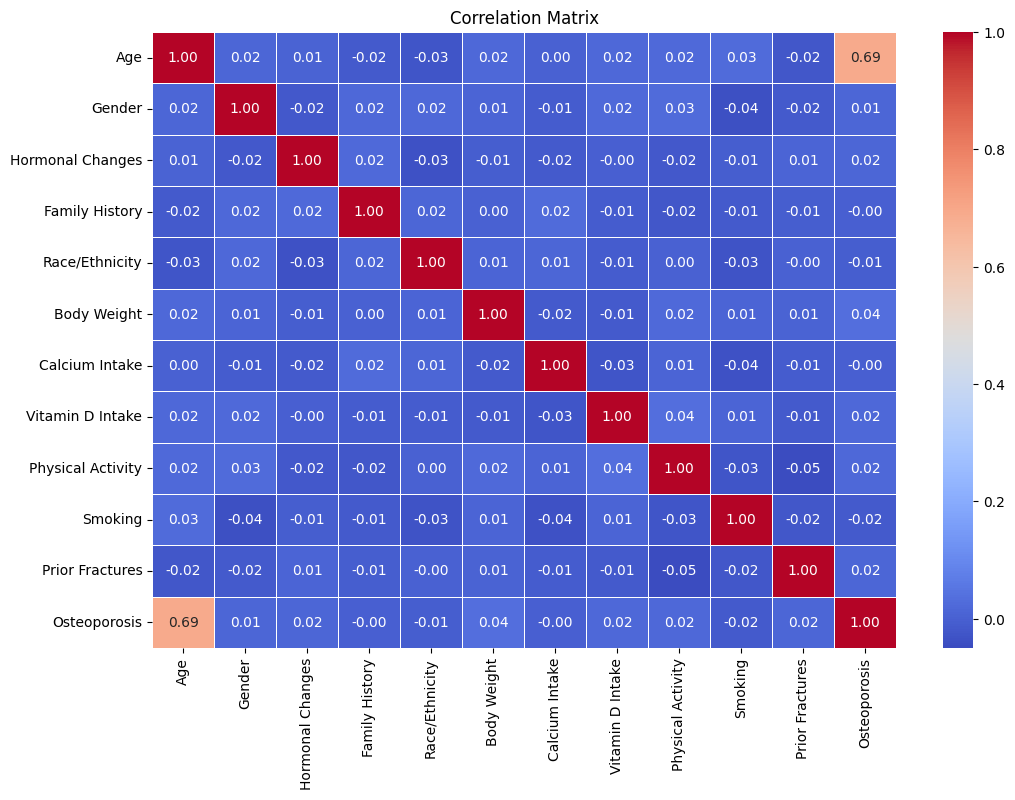

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Training the Model

In [9]:
x = df.drop("Osteoporosis", axis=1) 
y = df["Osteoporosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Evaluating the Models

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       201
           1       0.83      0.79      0.81       191

    accuracy                           0.82       392
   macro avg       0.82      0.82      0.82       392
weighted avg       0.82      0.82      0.82       392

Accuracy of Logistic Regression: 81.63%


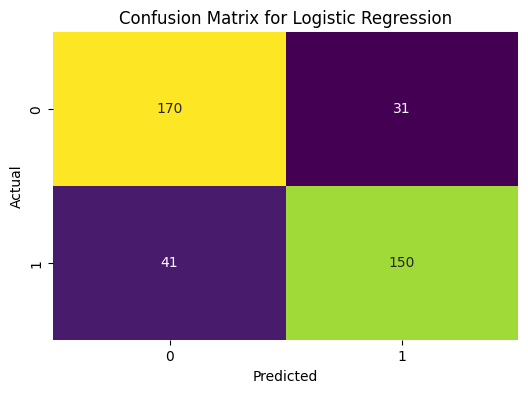

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       201
           1       0.85      0.83      0.84       191

    accuracy                           0.85       392
   macro avg       0.85      0.85      0.85       392
weighted avg       0.85      0.85      0.85       392

Accuracy of Decision Tree: 84.95%


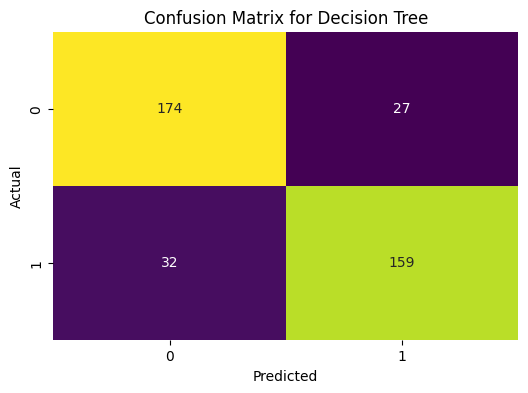

Model: Random Forest
              precision    recall  f1-score   support

           0       0.81      0.96      0.87       201
           1       0.94      0.76      0.84       191

    accuracy                           0.86       392
   macro avg       0.87      0.86      0.86       392
weighted avg       0.87      0.86      0.86       392

Accuracy of Random Forest: 85.97%


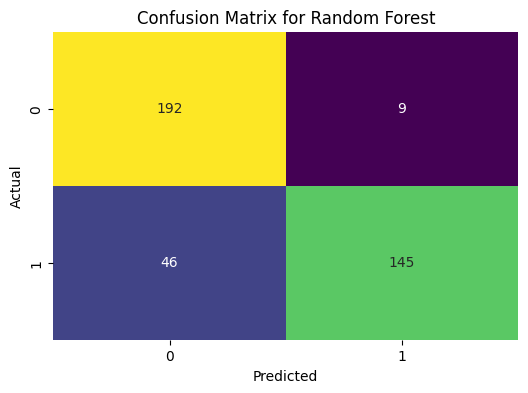

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       201
           1       1.00      0.80      0.89       191

    accuracy                           0.90       392
   macro avg       0.92      0.90      0.90       392
weighted avg       0.92      0.90      0.90       392

Accuracy of Gradient Boosting: 90.05%


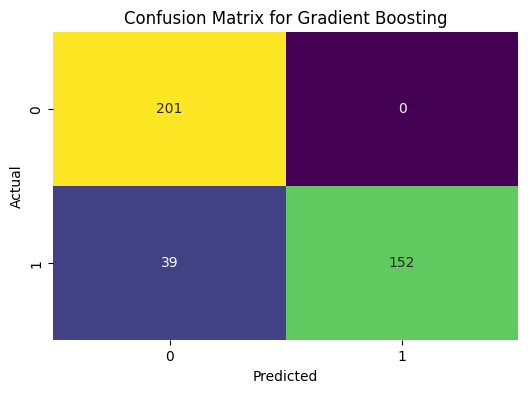

Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       201
           1       0.97      0.74      0.84       191

    accuracy                           0.86       392
   macro avg       0.89      0.86      0.86       392
weighted avg       0.88      0.86      0.86       392

Accuracy of Support Vector Machine: 86.48%


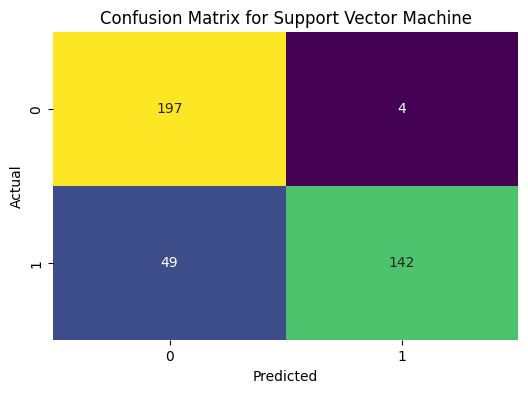

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       201
           1       0.95      0.78      0.86       191

    accuracy                           0.87       392
   macro avg       0.89      0.87      0.87       392
weighted avg       0.88      0.87      0.87       392

Accuracy of K-Nearest Neighbors: 87.24%


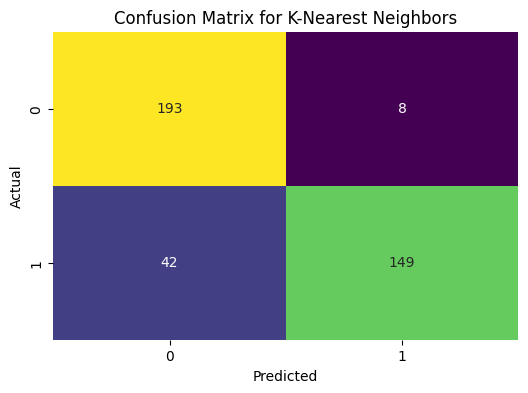

Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       201
           1       0.95      0.76      0.85       191

    accuracy                           0.86       392
   macro avg       0.88      0.86      0.86       392
weighted avg       0.88      0.86      0.86       392

Accuracy of Naive Bayes: 86.48%


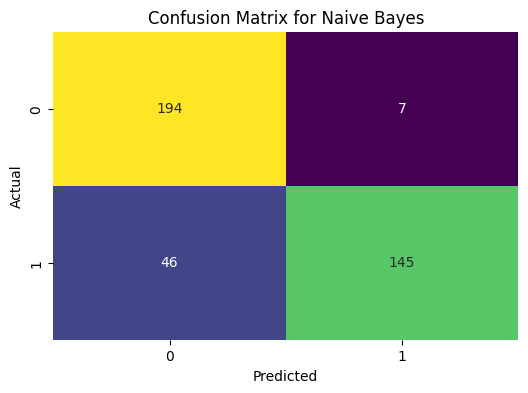

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}



for model_name, model in models.items():
    print("=======================================")
    print(f"Model: {model_name}")

    model.fit(x_train, y_train)
    

    predictions = model.predict(x_test)
    

    print(classification_report(y_test, predictions))
    print(f"Accuracy of {model_name}: {accuracy_score(y_test, predictions) * 100:.2f}%")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="viridis", fmt='d', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


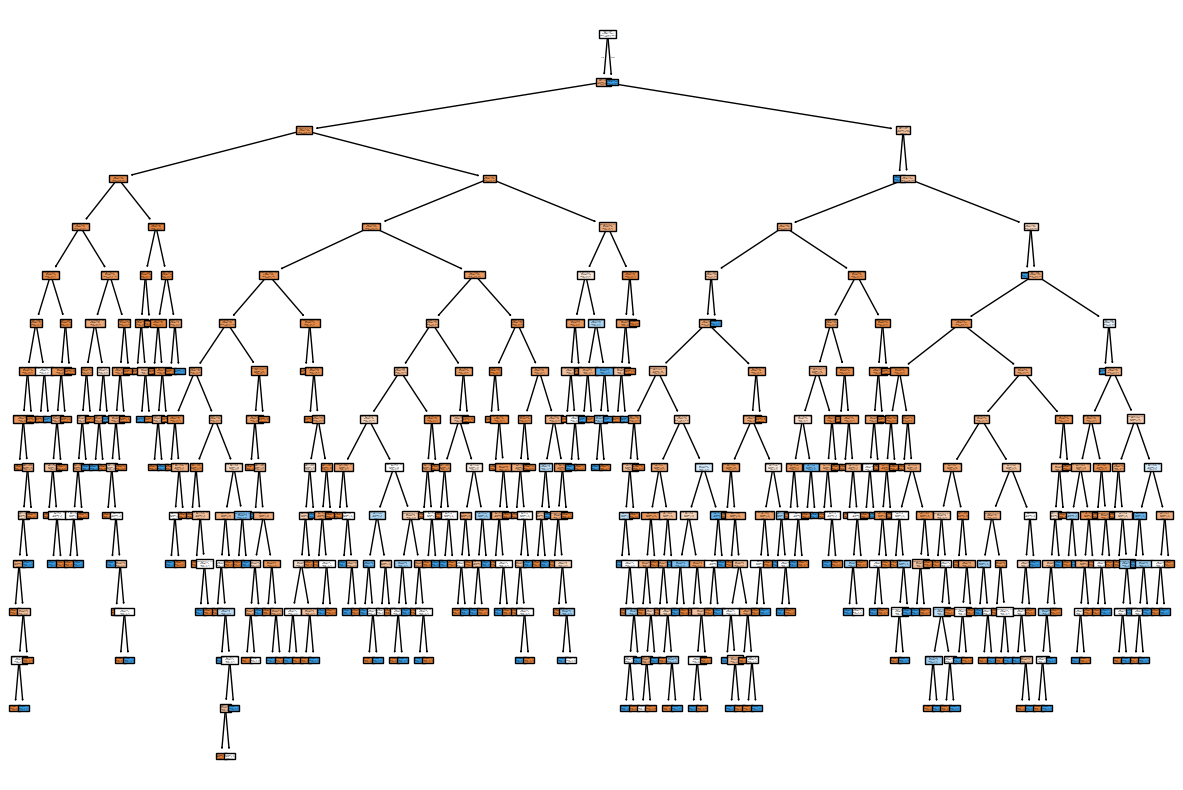

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Training Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train, y_train)


class_names = [str(c) for c in model.classes_]

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=class_names)
plt.show()
# decision tree

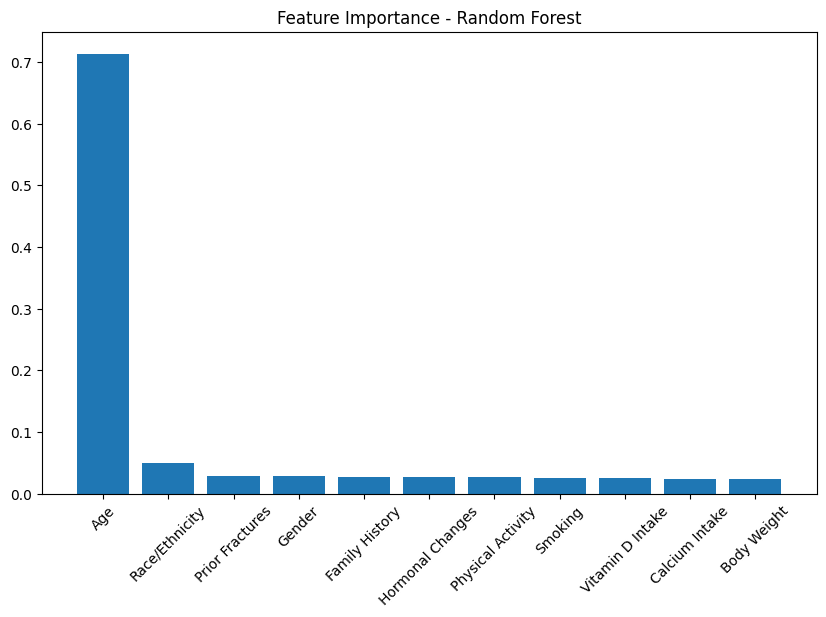

In [12]:
#Random Forest
import matplotlib.pyplot as plt
import numpy as np

feature_importances = models["Random Forest"].feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), x.columns[indices], rotation=45)
plt.show()


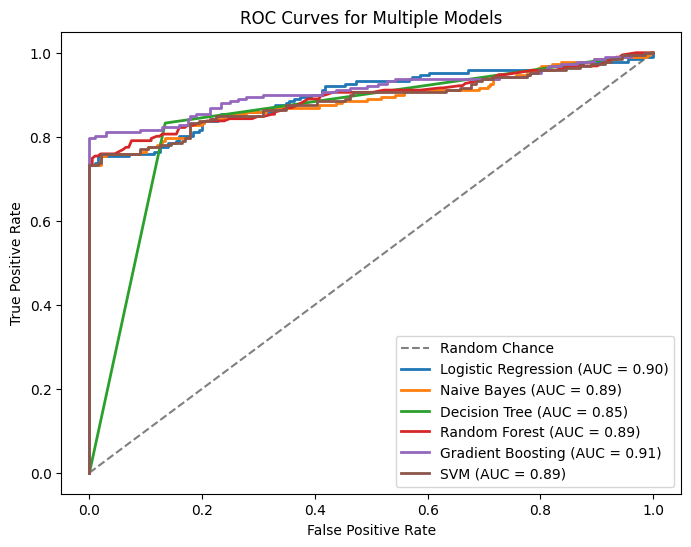

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, x_train, y_train, x_test, y_test):

    plt.figure(figsize=(8, 6))

    plt.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Random Chance")

    for (model_name, model) in models:

        model.fit(x_train, y_train)

   
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(x_test)[:, 1]
        else:

            y_scores = model.decision_function(x_test)

        # Compute ROC
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        # Plot
        plt.plot(
            fpr, tpr,
            lw=2,
            label=f"{model_name} (AUC = {roc_auc:.2f})"
        )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Multiple Models")
    plt.legend(loc="lower right")
    plt.show()

models = [
    ("Logistic Regression", LogisticRegression(max_iter=5000, random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("SVM", SVC(probability=True, random_state=42))  # 'probability=True' for ROC
]

plot_roc_curves(models, x_train, y_train, x_test, y_test)



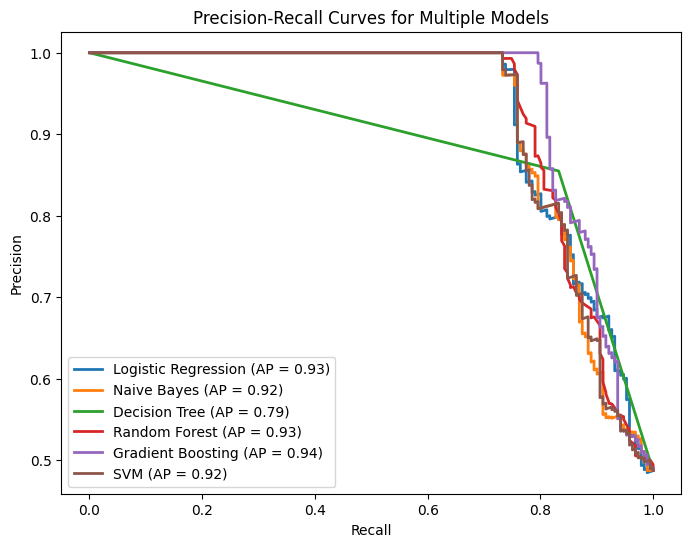

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curves(models, x_train, y_train, x_test, y_test):

    plt.figure(figsize=(8, 6))

    for (model_name, model) in models:
        # Fit the model
        model.fit(x_train, y_train)

        # Predict probabilities (or decision_function if needed)
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(x_test)[:, 1]
        else:
            
            y_scores = model.decision_function(x_test)

        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        avg_prec = average_precision_score(y_test, y_scores)

        plt.plot(
            recall,
            precision,
            lw=2,
            label=f"{model_name} (AP = {avg_prec:.2f})"
        )

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves for Multiple Models")
    plt.legend(loc="lower left")
    plt.show()


models = [
    ("Logistic Regression", LogisticRegression(max_iter=5000, random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("SVM", SVC(probability=True, random_state=42))  # 'probability=True' for PR curve
]

plot_precision_recall_curves(models, x_train, y_train, x_test, y_test)



In [15]:
import pandas as pd

def create_results_table():
    """
    Creates a results table for various models and their metrics.
    """
    results_data = {
        "Model": [
            "Logistic Regression",
            "Decision Tree",
            "Random Forest",
            "Gradient Boosting",
            "SVM",
            "Naive Bayes"
        ],
        "Accuracy": [0.801, 0.8265, 0.8469, 0.9081, 0.8469, 0.8418],
        "Precision": [0.83, 0.85, 0.88, 0.94, 0.78, 0.92],
        "Recall": [0.76, 0.87, 0.75, 0.84, 0.98, 0.75],
        "F1-Score": [0.79, 0.86, 0.81, 0.88, 0.87, 0.83]
    }

    # Create a DataFrame
    df_results = pd.DataFrame(results_data)

    df_results["Accuracy"] = df_results["Accuracy"] * 100

    print("## Results Table")
    print(df_results.to_markdown(index=False, floatfmt=".2f"))

if __name__ == "__main__":
    create_results_table()


## Results Table
| Model               |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| Logistic Regression |      80.10 |        0.83 |     0.76 |       0.79 |
| Decision Tree       |      82.65 |        0.85 |     0.87 |       0.86 |
| Random Forest       |      84.69 |        0.88 |     0.75 |       0.81 |
| Gradient Boosting   |      90.81 |        0.94 |     0.84 |       0.88 |
| SVM                 |      84.69 |        0.78 |     0.98 |       0.87 |
| Naive Bayes         |      84.18 |        0.92 |     0.75 |       0.83 |
